<a href="https://colab.research.google.com/github/Sunday-Okey/Pandas_Lesson_Colab/blob/main/DataFrame_Object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The DataFrame object

This notebook covers:

- Instantiating DataFrame objects from dictionaries and NumPy ndarrays
- Importing DataFrames from CSV files with the read_csv function
- Sorting DataFrame columns
- Accessing rows and columns in a DataFrame
- Setting and resetting a DataFrame index
- Renaming columns and index labels in a DataFrame

The pandas DataFrame is a two-dimensional table of data with rows and columns. As with a Series, pandas assigns an index label and an index position to each DataFrame row. Pandas also assigns a label and a position to each column. The DataFrame is two-dimensional because it requires two points of reference—a row and a column—to isolate a value from the data set.

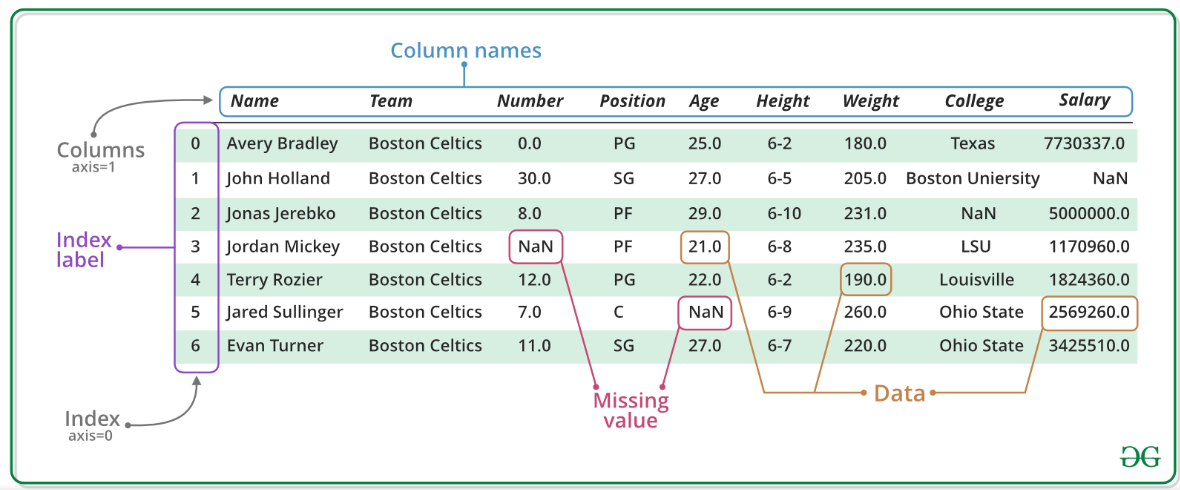

###Overview of Dataframe

The DataFrame class constructor is available at the top level of pandas. The syntax for instantiating a DataFrame object is identical to the one for instantiating a Series. We access the DataFrame class and instantiate with a pair of parentheses: pd.DataFrame().

###Creating a DataFrame from a dictionary

In [18]:
import pandas as pd
import numpy as np
import os

The constructor’s first parameter, data, expects the data that will populate the DataFrame. One suitable input is a Python dictionary in which the keys are column names and the values are column values. The next example passes a dictionary of string keys and list values. Pandas returns a DataFrame with three columns. Each list element becomes a value in its respective column:

In [2]:
city_data = {
            "City": ["New York City", "Paris", "Barcelona", "Rome"],
            "Country": ["United States", "France", "Spain", "Italy"],
            "Population": [8600000, 2141000, 5515000, 2873000]
        }

In [4]:
cities = pd.DataFrame(city_data)
cities

,City,Country,Population
0,New York City,United States,8600000
1,Paris,France,2141000
2,Barcelona,Spain,5515000
3,Rome,Italy,2873000


What if we wanted to swap the column headers with the index labels? Two options are available here. We can invoke the transpose method on the DataFrame or access its T attribute:

In [5]:
cities.T

,0,1,2,3
City,New York City,Paris,Barcelona,Rome
Country,United States,France,Spain,Italy
Population,8600000,2141000,5515000,2873000


In [6]:
cities.transpose()

,0,1,2,3
City,New York City,Paris,Barcelona,Rome
Country,United States,France,Spain,Italy
Population,8600000,2141000,5515000,2873000


###Creating a DataFrame from a NumPy ndarray

In [9]:
random_data = np.random.randint(1,101, (3, 5))
random_data

array([[42,  8, 19, 46, 26],
       [71, 75, 31, 53, 98],
       [75,  7, 50, 23, 21]])

In [10]:
pd.DataFrame(random_data)

,0,1,2,3,4
0,42,8,19,46,26
1,71,75,31,53,98
2,75,7,50,23,21


We can manually set the row labels with the DataFrame constructor’s index parameter, which accepts any iterable object, including a list, tuple, or ndarray. Note that the iterable’s length must be equal to the data set’s number of rows. We’re passing a 3 x 5 ndarray, so we must provide three row labels:

In [13]:
row_labels = ["Morning", "Afternoon", "Evening"]
temperatures = pd.DataFrame(data = random_data, index = row_labels)
temperatures

,0,1,2,3,4
Morning,42,8,19,46,26
Afternoon,71,75,31,53,98
Evening,75,7,50,23,21


We can set the column names with the constructor’s columns parameter. The ndarray includes five columns, so we must pass an iterable with five items. The next example passes the column names in a tuple:

In [14]:
row_labels = ["Morning", "Afternoon", "Evening"]
column_labels = (
            "Monday",
            "Tuesday",
            "Wednesday",
            "Thursday",
            "Friday",
        )

In [15]:
pd.DataFrame(data =random_data, index=row_labels, columns=column_labels )

,Monday,Tuesday,Wednesday,Thursday,Friday
Morning,42,8,19,46,26
Afternoon,71,75,31,53,98
Evening,75,7,50,23,21


Pandas permits duplicates in the row and column indices. In the next example, "Morning" appears twice in the rows’ index labels, and "Tuesday" appears twice in the columns’ index labels:

In [16]:
row_labels = ["Morning", "Afternoon", "Morning"]
column_labels = [
            "Monday",
            "Tuesday",
            "Wednesday",
            "Tuesday",
            "Friday"
        ]

In [17]:
pd.DataFrame(data = random_data, index=row_labels, columns=column_labels)

,Monday,Tuesday,Wednesday,Tuesday,Friday
Morning,42,8,19,46,26
Afternoon,71,75,31,53,98
Morning,75,7,50,23,21


 ### Importing a DataFrame with the read_csv function

The nba.csv data set is a list of professional basketball players in the National Basketball Association (NBA) during the 2019–20 season. Each row includes a player’s name, team, position, birthday, and salary. A good mix of data types is scattered throughout, making this data set excellent for exploring the basics of DataFrames.

Let’s use the read_csv function at the top level of pandas to import the file (we introduced this function in chapter 3). The function accepts a filename as its first argument and returns a DataFrame by default. Before you execute the following code, please make sure that the data set is in the same directory as your Jupyter Notebook:



In [20]:
# Download the data
import urllib.request
datapath = os.path.join("data", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/paskhaver/pandas-in-action/master"
os.makedirs(datapath, exist_ok=True)
for filename in ("nfl.csv", "nba.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "/chapter_04_the_dataframe_object/" + filename
    urllib.request.urlretrieve(url, datapath + filename)